# DESC Lamp demo 
## Catalog extraction
This notebook shows how to pull postage stamps to use for strong gravitaional lens searches.

# DC2: Generate Postage Stamps (Cutouts) for objects in the Object Catalog

Owner: **Rémy Joseph** ([@herjy](https://github.com/herjy/DESC-Lamp))
<br>Last Verified to Run: **2021-11-22** (by @herjy)

This notebook is partly based on the `dm_butler_postage_stamps_for_object_catalogs` notebook by Yao-Yuan Mao and the previous notebooks `dm_butler_postage_stamps` notebook by Michael Wood-Vasey and the Stack Club `ButlerTutorial` by Daniel Perrefort.

Here we simply copy what was in Yao-Yuan's notebook and trim it to the usecase of selecting galaxies from cosmoDC2 catalogs with magnitude cuts. The notebook will in fine evolve to incorporate the functions we design to streamline this preselection process.

### Logistics
This is intended to be runnable at NERSC through the https://jupyter.nersc.gov interface from a local git clone of https://github.com/herjy/DESC-Lamp in your NERSC directory.  But you can also run it wherever, with appropriate adjustment of the 'repo' location to point to a place where you have a Butler repo will all of the images. 

This notebook uses the `desc-stack-weekly-latest` kernel. Instructions for setting up the proper DESC python kernel can be found here: https://confluence.slac.stanford.edu/x/o5DVE

## Set up

First we will load the needed modules and DC2 DR6 data sets: object catalogs (with `GCRCatalogs`) and DRP products (with `desc_dc2_dm_data`).

In [1]:
# A few common packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# We will use astropy's WCS and ZScaleInterval for plotting
from astropy.wcs import WCS
from astropy.visualization import ZScaleInterval

# We will use several stack functions
import lsst.geom
import lsst.afw.display as afwDisplay
import lsst.afw.display.rgb as rgb

# And also DESC packages to get the data path
import GCRCatalogs
from GCRCatalogs import GCRQuery
import desc_dc2_dm_data

We will be using the DC2 Run 2.2i DR6 v2 data. The catalogs and there validation are described here: https://arxiv.org/pdf/2110.03769.pdf


In [2]:
dc2_data_version = "2.2i_dr6"
GCRCatalogs.get_available_catalogs(names_only=True, name_contains=dc2_data_version)
cat = GCRCatalogs.load_catalog("dc2_object_run"+dc2_data_version)


All the catalog names (including old catalogs) can be found by uncommenting the line below.
Information obout these catalogs can be found in the [DC2 data product overview](https://confluence.slac.stanford.edu/display/LSSTDESC/DC2+Data+Product+Overview). The Rubin project's [Data product definition document](https://docushare.lsstcorp.org/docushare/dsweb/Get/LSE-163/LSE-163_DataProductsDefinitionDocumentDPDD.pdf)(DPDD) provides further insight into the content of these catalogs. 

These are [GCR catalogs](https://github.com/LSSTDESC/gcr-catalogs) that may use slightly different definitions and namings than the one used in Rubin's DPDD. The details for the entries of these catalogs can be found in the [GCR Catalogs SChema description](https://github.com/LSSTDESC/gcr-catalogs/blob/master/GCRCatalogs/SCHEMA.md#schema-for-dc2-object-catalogs)

In [ ]:
#print('\n'.join(sorted(GCRCatalogs.get_available_catalogs(include_default_only=False))))

base5000_v1.1.1
base5000_v1.1.1_9431_9812
base5000_v1.1.1_9556
base5000_v1.1.1_image
base5000_v1.1.1_small
base5000_v1.1.1_z_0_1
base5000_v1.1.1_z_1_2
baseDC2_snapshot_z0.15_v0.1
baseDC2_snapshot_z0.15_v0.1_small
baseDC2_snapshot_z1.01_v0.1
baseDC2_v1.1_9431_9812
baseDC2_v1.1_9556
baseDC2_v1.1_image
buzzard
buzzard_high-res
buzzard_high-res_v1.1
buzzard_test
buzzard_v2.0.0_3
buzzard_v2.0.0_4
buzzard_v2.0.0_test
cosmoDC2
cosmoDC2_v1.0
cosmoDC2_v1.0_10194_10452
cosmoDC2_v1.0_8786_9049
cosmoDC2_v1.0_9050_9430
cosmoDC2_v1.0_9431_9812
cosmoDC2_v1.0_9556
cosmoDC2_v1.0_9813_10193
cosmoDC2_v1.0_image
cosmoDC2_v1.0_image_addon_knots
cosmoDC2_v1.0_small
cosmoDC2_v1.1.4
cosmoDC2_v1.1.4_image
cosmoDC2_v1.1.4_image_addon_knots
cosmoDC2_v1.1.4_image_combined_agn
cosmoDC2_v1.1.4_image_with_photoz_calib
cosmoDC2_v1.1.4_image_with_photozs_flexzboost_v1
cosmoDC2_v1.1.4_image_with_photozs_v1
cosmoDC2_v1.1.4_parquet
cosmoDC2_v1.1.4_redmapper_v0.8.1
cosmoDC2_v1.1.4_small
cosmoDC2_v1.1.4_small_combined_agn


Summoning Alfred:

In [17]:
butler = desc_dc2_dm_data.get_butler(dc2_data_version)

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0/lib/python3.8/site-packages/desc_dc2_dm_data/butler.py:29: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  return Butler(REPOS[run])
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0/lib/python3.8/site-packages/desc_dc2_dm_data/butler.py:29: FutureWarning: Gen2 Butler has been deprecated (ImsimMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  return Butler(REPOS[run])


CameraMapper INFO: Loading exposure registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/registry.sqlite3
CameraMapper INFO: Loading calib registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/CALIB/calibRegistry.sqlite3
LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading calib registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading exposure registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/registry.sqlite3
CameraMapper INFO: Loading calib registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_

## Select a sample of galaxies based on selection criteria

Here we will use arbitrary (actually from [Rojas et al. 2021](https://arxiv.org/pdf/2109.00014.pdf)) selection criteria to extract a few moock patches.

To learn what columns are in the object catalogs, refer to [this schema table](https://github.com/LSSTDESC/gcr-catalogs/blob/master/GCRCatalogs/SCHEMA.md#schema-for-dc2-object-catalogs). And sometimes it'd be helpful to look at the [source code](https://github.com/LSSTDESC/gcr-catalogs/blob/master/GCRCatalogs/dc2_object.py#L341).

In [44]:
bright_galaxy_query = GCRQuery(
    "clean",
    "extendedness == 1",
    "mag_g_cModel- mag_i_cModel < 5",
    "mag_g_cModel- mag_i_cModel > 1.8",
    "mag_g_cModel- mag_r_cModel < 3",
    "mag_g_cModel- mag_r_cModel > 0.6",
    "mag_r_cModel < 22.5",
    "mag_r_cModel > 18",
    "mag_g_cModel > 20",
    "mag_i_cModel > 18.2",
    "snr_g_cModel > 10",
    "snr_r_cModel > 10",
    "snr_i_cModel > 10",
)

columns_to_get = ["objectId", "ra", "dec", "mag_r_cModel", "tract", "patch"]
assert cat.has_quantities(columns_to_get)

# Here we use native_filters to limit to tract == 4639 to save some load time

objects = cat.get_quantities(columns_to_get, filters=bright_galaxy_query, native_filters="tract == 4639")
objects  # get_quantities returns an ordinary python dictionary

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0/lib/python3.8/site-packages/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0/lib/python3.8/site-packages/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky


{'tract': array([4639, 4639, 4639, ..., 4639, 4639, 4639]),
 'patch': array(['0,0', '0,0', '0,0', ..., '6,6', '6,6', '6,6'], dtype=object),
 'dec': array([-31.2074435 , -31.08962157, -31.08522401, ..., -29.75300565,
        -29.75401013, -29.7523355 ]),
 'objectId': array([20402537765014399, 20402537765020067, 20402537765020317, ...,
        20403388168578462, 20403388168578557, 20403388168578558]),
 'mag_r_cModel': array([21.50097011, 21.14120551, 21.98201925, ..., 20.90850583,
        22.15088985, 22.3650051 ]),
 'ra': array([56.99553034, 57.12716304, 56.98661823, ..., 55.58569562,
        55.45228762, 55.45077693])}

In [45]:
print(len(objects['tract']))

9617


In [46]:
# make it a pandas data frame for the ease of manipulation
objects = pd.DataFrame(objects)
objects

,tract,patch,dec,objectId,mag_r_cModel,ra
0,4639,"0,0",-31.207443,20402537765014399,21.500970,56.995530
1,4639,"0,0",-31.089622,20402537765020067,21.141206,57.127163
2,4639,"0,0",-31.085224,20402537765020317,21.982019,56.986618
3,4639,"0,0",-31.234800,20402537765038496,21.424457,57.027711
4,4639,"0,0",-31.239477,20402537765038774,20.866262,57.063685
...,...,...,...,...,...,...
9612,4639,"6,6",-29.757334,20403388168578089,21.715730,55.575507
9613,4639,"6,6",-29.753647,20403388168578456,21.650580,55.655037
9614,4639,"6,6",-29.753006,20403388168578462,20.908506,55.585696
9615,4639,"6,6",-29.754010,20403388168578557,22.150890,55.452288


## Extrtacting postage stamps

Now we need to extract postage stamps of the coadded images. For that we need for each object there coordinates, but also there tact and patch number.

In [47]:
skymap = butler.get('deepCoadd_skyMap')

Now we build a function that will get tratc and patch inforrmation for a given (Ra, Dec) position:

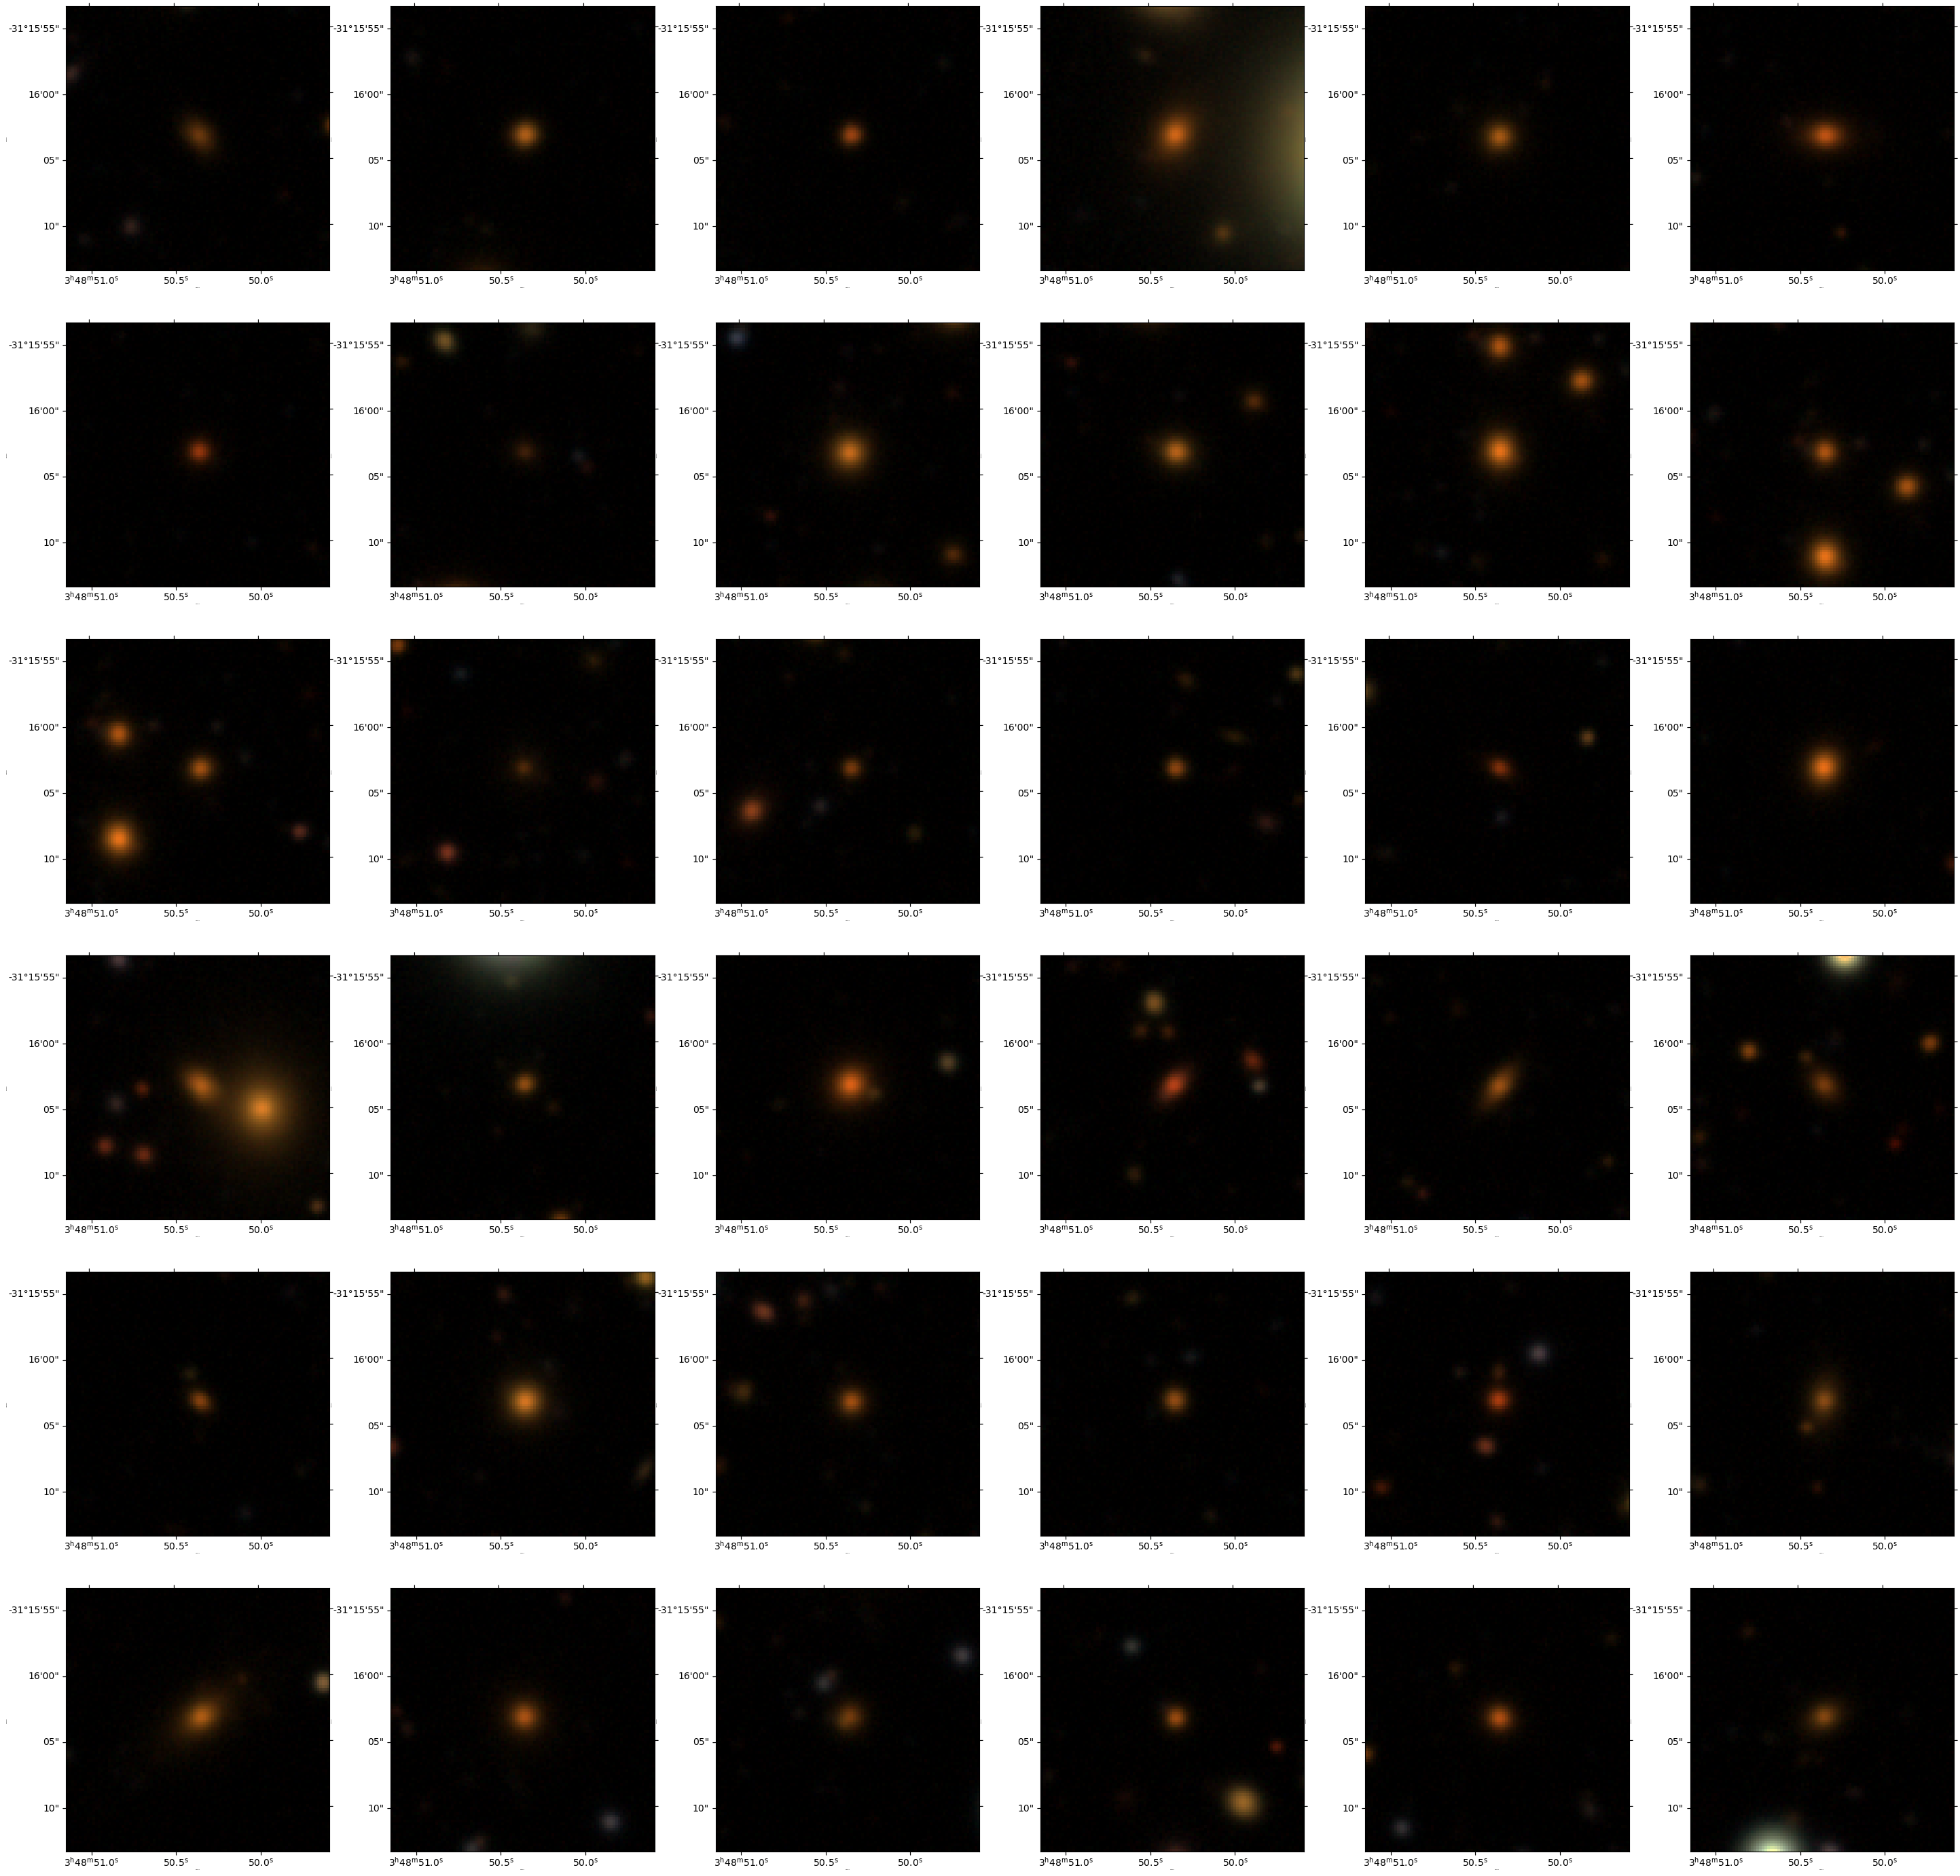

In [52]:
fig = plt.figure(figsize=(36, 36), dpi=100)
gs = plt.GridSpec(6, 6, fig)

#Limiting to 16 objects
n0 = 72
objects_sel = objects.loc[:36]

cutout_size = 100
cutout_extent = lsst.geom.ExtentI(cutout_size, cutout_size)
id=0
for (_, object_this), gs_this in zip(objects_sel.iterrows(), gs):
    radec = lsst.geom.SpherePoint(object_this["ra"], object_this["dec"], lsst.geom.degrees)
    center = skymap.findTract(radec).getWcs().skyToPixel(radec)
    bbox = lsst.geom.BoxI(lsst.geom.Point2I((center.x - cutout_size*0.5, center.y - cutout_size*0.5)), cutout_extent)

    cutouts = [butler.get("deepCoadd_sub", bbox=bbox, tract=object_this["tract"], patch=object_this["patch"], filter=band) for band in "irg"]
    wcs_fits_meta = cutouts[0].getWcs().getFitsMetadata()
    image_rgb = rgb.makeRGB(*cutouts)
    del cutouts  # let gc save some memory for us

    ax = plt.subplot(gs_this, projection=WCS(wcs_fits_meta), label=str(object_this["objectId"]))
    ax.imshow(image_rgb, origin='lower')
    del image_rgb  # let gc save some memory for us
    
    for c in ax.coords:
        c.set_ticklabel(exclude_overlapping=True, size=10)
        c.set_axislabel('', size=0)
